In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\USER\Documents\ML and NLP\Ridge Lassso Elastic Regression Practicals\Algerian_forest_fires_dataset_Cleaned3.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
## drop day , moth ,year , because we dont want for the train
df.drop(['day','month','year'],axis=1,inplace=True)

In [4]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
## encoding categorical data
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [7]:
## devide our feautes in to dependent and independent features
X= df.drop('Temperature',axis=1)
Y= df['Temperature']
X.head()

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [8]:
## devide our feautes in to dependent and independent features
X= df.drop('FWI',axis=1)
Y= df['FWI']

In [9]:
## Train Test split
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [10]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [11]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


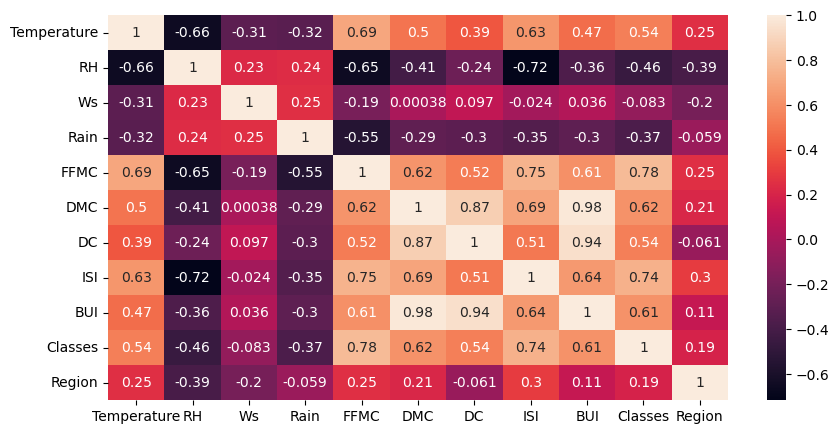

In [12]:
## Check for multicollinarity , independent feauteres should not be highly correlated based on trushold values
plt.figure(figsize=(10,5))
corr = X_train.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [13]:
def correlation(dataset, threshold):
    """
    Return a set of column names that are highly correlated with others.
    Any column whose absolute correlation with a *previous* column exceeds
    `threshold` will be marked.
    """
    col_corr = set()
    corr_matrix = dataset.corr(numeric_only=True)  # Pearson by default

    # Loop over the upper triangle (excluding the diagonal)
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)

    return col_corr

In [14]:
## treshold domain expertise
corr_features = correlation(X_train,0.85)
print(corr_features)

{'DC', 'BUI'}


In [15]:
## drop feauteres with mode that 0.85 correlation
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [16]:
## feature scaling or standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

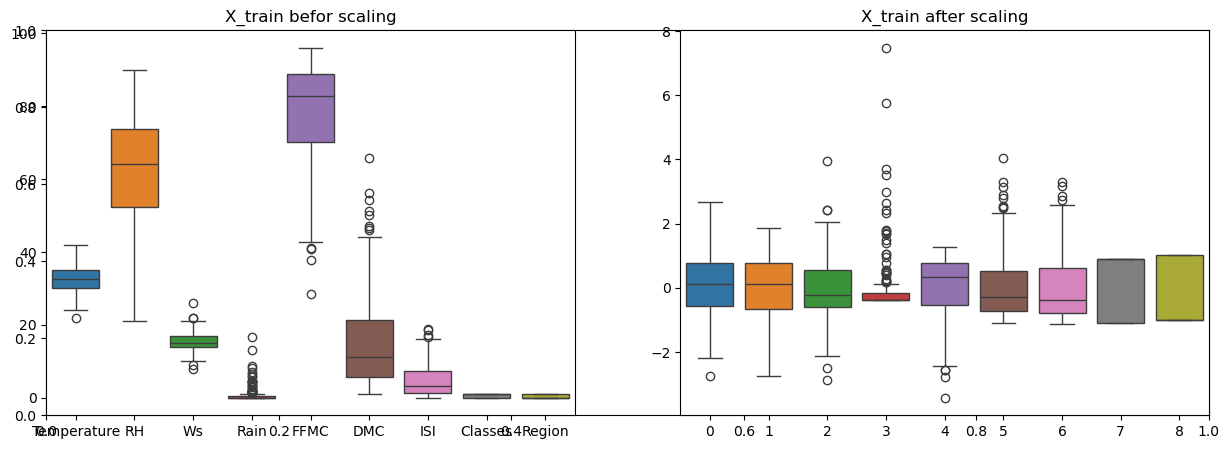

In [17]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train befor scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train after scaling")
plt.show()

In [18]:
## liniear regression model
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train_scaled,Y_train)
y_pred = regression.predict(X_test_scaled)

In [19]:
## performance test
from sklearn.metrics import mean_squared_error , mean_absolute_error
mse = mean_squared_error(Y_test,y_pred)
mae = mean_absolute_error(Y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

0.6742766873791581
0.5468236465249976
0.8211435242265253


In [20]:
## R score performance test
from sklearn.metrics import r2_score
score = r2_score(Y_test,y_pred)
print(score)

0.9847657384266951


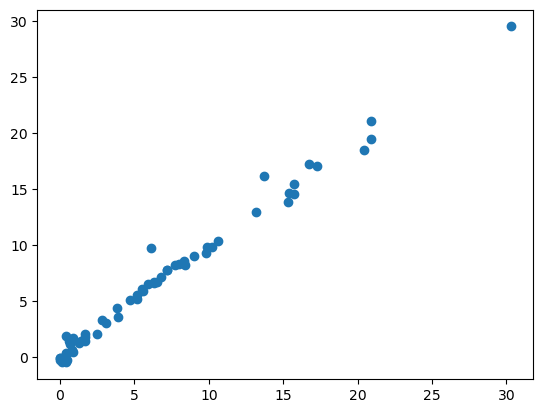

In [21]:
plt.scatter(Y_test,y_pred)
plt.show()

2.2483458918974746
1.1331759949144085
1.4994485292591655
0.9492020263112388


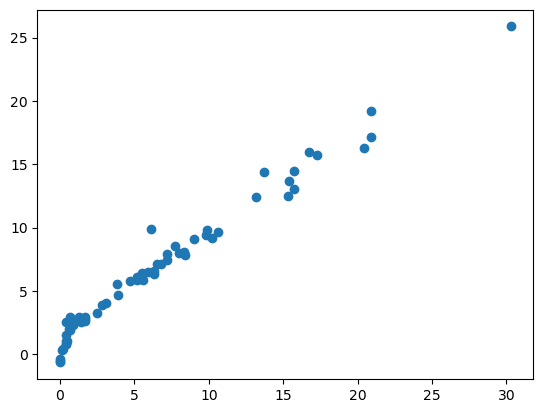

In [22]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(X_train_scaled,Y_train)
y_pred = lasso.predict(X_test_scaled)
mse = mean_squared_error(Y_test,y_pred)
mae = mean_absolute_error(Y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)
score = r2_score(Y_test,y_pred)
print(score)
plt.scatter(Y_test,y_pred)
plt.show()

2.2483458918974746
1.1331759949144085
1.4994485292591655
0.9492020263112388


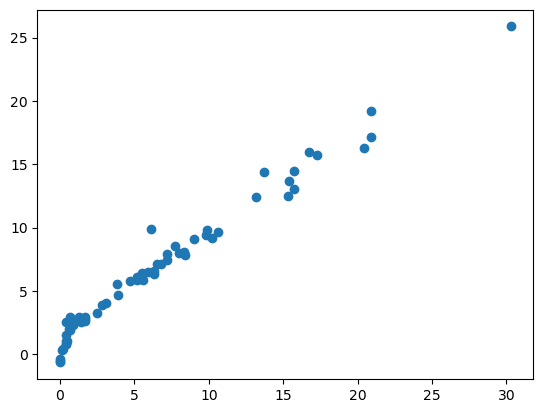

In [24]:
## laso cross validation
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,Y_train)
y_pred = lasso.predict(X_test_scaled)
mse = mean_squared_error(Y_test,y_pred)
mae = mean_absolute_error(Y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)
score = r2_score(Y_test,y_pred)
print(score)
plt.scatter(Y_test,y_pred)
plt.show()

0.6949198918152067
0.5642305340105693
0.8336185529456543
0.9842993364555513


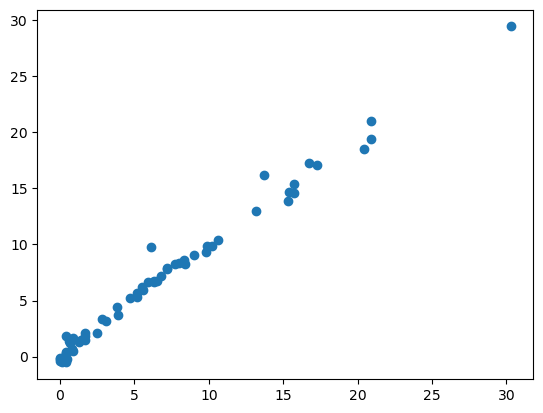

In [34]:
## Ridge regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(X_train_scaled,Y_train)
y_pred = ridge.predict(X_test_scaled)
mse = mean_squared_error(Y_test,y_pred)
mae = mean_absolute_error(Y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)
score = r2_score(Y_test,y_pred)
print(score)
plt.scatter(Y_test,y_pred)
plt.show()

0.6949198918152067
0.5642305340105693
0.8336185529456543
0.9842993364555513


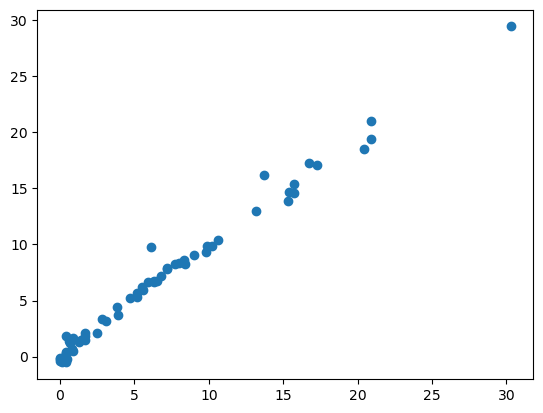

In [33]:
## RidgeCV 
from sklearn.linear_model import RidgeCV
ridgeccv = RidgeCV(cv=5)
ridgeccv.fit(X_train_scaled,Y_train)
y_pred = ridgeccv.predict(X_test_scaled)
mse = mean_squared_error(Y_test,y_pred)
mae = mean_absolute_error(Y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)
score = r2_score(Y_test,y_pred)
print(score)
plt.scatter(Y_test,y_pred)
plt.show()

In [27]:
ridge.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

5.517251101025224
1.8822353634896
2.3488829474933874
0.8753460589519703


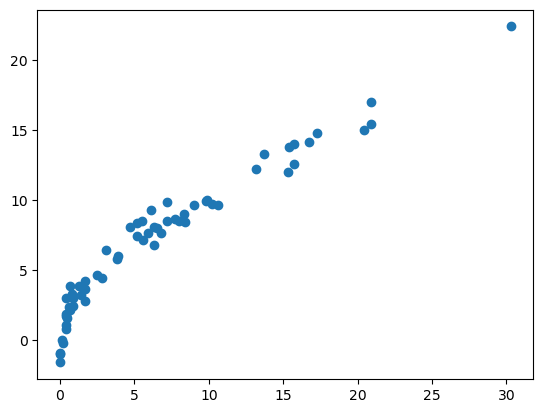

In [28]:
## Elastic net regression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.metrics import r2_score
elstic = ElasticNet()
elstic.fit(X_train_scaled,Y_train)
y_pred = elstic.predict(X_test_scaled)
mse = mean_squared_error(Y_test,y_pred)
mae = mean_absolute_error(Y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)
score = r2_score(Y_test,y_pred)
print(score)
plt.scatter(Y_test,y_pred)
plt.show()

0.8222830416276272
0.6575946731430904
0.9067982364493368
0.9814217587854941


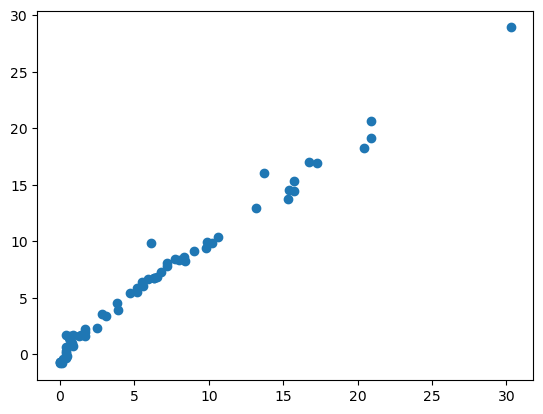

In [29]:
## Elastic net cv
from sklearn.linear_model import ElasticNetCV
elasticcv = ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,Y_train)
y_pred = elasticcv.predict(X_test_scaled)
mse = mean_squared_error(Y_test,y_pred)
mae = mean_absolute_error(Y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)
score = r2_score(Y_test,y_pred)
print(score)
plt.scatter(Y_test,y_pred)
plt.show()

In [30]:
elasticcv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

In [35]:
## pickle the machine learning model and preprocesssing standard scaler
import pickle

In [36]:
scaler, ridge

(StandardScaler(), Ridge())

In [37]:
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge_model.pkl','wb'))